In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np

/Users/david.fischer/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Generate some data:

In [2]:
from batchglm.api.models.nb_glm import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=4, num_confounders=0)
# sample parameters from positive truncated N(1, 0.1)
mu=1; phi=0.1
sim.generate_params(rand_fn_loc=lambda size: mu + scipy.stats.truncnorm.rvs(-mu / phi, np.infty, scale=phi, size=size))
sim.generate_data()

# count data
X = sim.X
# sample description
sample_description = sim.sample_description

The sample description should be a pandas DataFrame with `num_observations` rows.
Each column should represent a property of the dataset.

The module `batchglm.api.data` contains some helper functions which can be useful to create this sample description:

- `sample_description_from_anndata()`
- `sample_description_from_xarray()`

In [3]:
sample_description.iloc[:10,:]

,batch
observations,
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


# Run differential expression test:

The pairwise test allows to perform comparisons between each group of samples to the remaining samples.

It needs a parameter `grouping` which assigns a group to each sample.
This `grouping` can either be a vector of length `num_observations` or a string specifying a column in the sample description.
Since we simulated `grouping` with `num_batches=4` different groups, the pairwise test will perform 4 different tests.

The parameter `test` specifies which kind of statistical test will be performed for each pair of groups.
Possible arguments are all `two_sample` tests (e.g. 'wald', 't-test', 'wilcoxon', ...).

In [4]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

import diffxpy.api as de

test = de.test.versus_rest(
    data=X,
    grouping="batch",
    test="wald",
    noise_model="nb",
    sample_description=sample_description
)


Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:746: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:776: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)


training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready
Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:746: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:776: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)


training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready
Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:746: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:776: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)


training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready
Estimating model...
Using closed-form MLE initialization for mean
Using closed-form MME initialization for dispersion


/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:746: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_prime = np.linalg.lstsq(unique_design_loc, a)
/Users/david.fischer/gitDevelopment/batchglm/batchglm/train/tf/nb_glm/estimator.py:776: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b_prime = np.linalg.lstsq(unique_design_scale, b)


training strategy: [{'learning_rate': 0.01, 'convergence_criteria': 't_test', 'stop_at_loss_change': 0.25, 'loss_window_size': 10, 'use_batching': False, 'optim_algo': 'GD'}]
Beginning with training sequence #1
Training sequence #1 complete
Estimating model ready


# Obtaining the results

## Global results across all tests

The p-/q-values can be obtained by calling `test.pval` / `test.qval`:

In [5]:
np.set_printoptions(precision=3)
print("shape of p-values: %s" % str(test.pval.shape))

shape of p-values: (1, 4, 100)


p-values of first gene:

In [6]:
test.pval[:,:,0]

array([[6.268e-01, 2.253e-04, 8.254e-03, 7.072e-01]])

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [7]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean
0,0,0.000225,0.005132,0.189082,8946.265
1,1,0.000007,0.000422,0.218095,9789.280
2,2,0.232231,0.459864,0.146569,9447.840
3,3,0.003767,0.045655,0.218979,2700.495
4,4,0.026339,0.126935,0.174990,2143.140
5,5,0.178694,0.386737,0.234957,1641.895
6,6,0.000032,0.001181,0.599533,6296.785
7,7,0.062572,0.225484,0.107716,9455.245
8,8,0.013146,0.092249,0.220149,7398.700
9,9,0.024883,0.126660,0.179943,1870.865


- `gene`: gene name / identifier
- `pval`: minimal p-value of the tests
- `qval`: minimal multiple testing - corrected p-value of the tests
- `log2fc`: maximal $log_2$ fold change of the tests

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

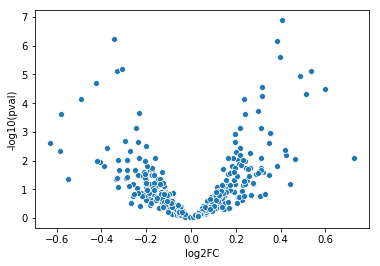

In [8]:
test.plot_volcano()
plt.show()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

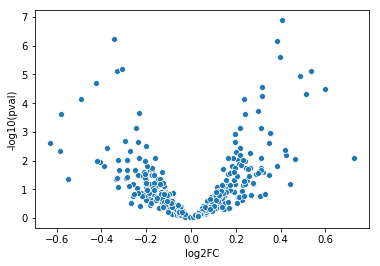

In [9]:
test.plot_diagnostics()

## Results specific for one test

One may be specifically interested in a the comparison of a specific pair of groups. Multiple methods presented above are adapated for this scenario and are simply called test.*_group

The group identifiers are:

In [10]:
print(np.unique(sample_description['batch'].values))

['0' '1' '2' '3']


The results for the comparison of groups '2' versus the rest are:

In [11]:
test.log2_fold_change().shape

(1, 4, 100)

In [12]:
test.pval_group(group='2')[:10]

array([8.254e-03, 6.508e-06, 5.291e-01, 3.767e-03, 2.634e-02, 6.151e-01,
       6.732e-01, 1.741e-01, 1.315e-02, 1.073e-01])

In [13]:
test.summary_group(group='2').iloc[:10,:]

AttributeError: 'DifferentialExpressionTestVsRest' object has no attribute '_check_groups'